In [1]:
# !pip install geojson

In [1]:
%matplotlib inline

import datacube
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
#import geojson as geo
import geopandas as gpd
from shapely.geometry import box
from IPython.display import Image
from geojson import Feature, Point, FeatureCollection
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from datacube.utils.geometry import Geometry
from deafrica_tools.datahandling import load_ard
from deafrica_tools.bandindices import calculate_indices
from deafrica_tools.plotting import display_map, xr_animation
from deafrica_tools.dask import create_local_dask_cluster
from deafrica_tools.spatial import xr_rasterize
from deafrica_tools.areaofinterest import define_area
#def define_area(lat=None, lon=None, buffer=None, shapefile_path=None):
    #aoi = define_area(lat=15.754, lon=80.786 , buffer=0.03)


In [2]:
%matplotlib inline

import datacube
from deafrica_tools.plotting import rgb, display_map
import datacube
import odc.algo
import matplotlib.pyplot as plt
from datacube.utils.cog import write_cog

from deafrica_tools.plotting import display_map, rgb

In [3]:
dc = datacube.Datacube(app='water_extent')

In [4]:
# Method 1: Specify the latitude, longitude, and buffer
aoi = define_area(lat=15.754, lon=80.786 , buffer=0.3)


# Method 2: Use a polygon as a GeoJSON or Esri Shapefile. 
#aoi = define_area(shapefile_path='aoi.shp')

#Create a geopolygon and geodataframe of the area of interest
geopolygon = Geometry(aoi["features"][0]["geometry"], crs="epsg:4326")
geopolygon_gdf = gpd.GeoDataFrame(geometry=[geopolygon], crs=geopolygon.crs)

# Get the latitude and longitude range of the geopolygon
lat_range = (geopolygon_gdf.total_bounds[1], geopolygon_gdf.total_bounds[3])
lon_range = (geopolygon_gdf.total_bounds[0], geopolygon_gdf.total_bounds[2])


# Define the start year and end year
start_year = '2022-01-15'
end_year = '2023-02-15'

In [5]:
display_map(lon_range, lat_range)

/home/adithya/anaconda3/envs/odc_env/lib/python3.8/site-packages/deafrica_tools/plotting.py:284: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  all_longitude, all_latitude = transform(Proj(crs), Proj("EPSG:4326"), all_x, all_y)


In [6]:
create_local_dask_cluster()

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 1
Total threads: 12,Total memory: 12.16 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38029,Workers: 1
Dashboard: /proxy/8787/status,Total threads: 12
Started: Just now,Total memory: 12.16 GiB
Comm: tcp://127.0.0.1:38331,Total threads: 12
Dashboard: /proxy/34573/status,Memory: 12.16 GiB
Nanny: tcp://127.0.0.1:33417,


In [7]:


#load Sentinel 2 data
ds = dc.load(product="s2a_sen2cor_granule",
                 measurements=["B01_60m","B02_10m","B03_10m","B04_10m","B05_20m","B06_20m","B07_20m","B08_10m","B09_60m","B11_20m","B12_20m"],
             x=lon_range,
             y=lat_range,
             time=(start_year,end_year),
             output_crs='EPSG:6933',
             resolution=(-20, 20))

print(ds)
#ds = load_ard(dc=dc,
             #products=['s2a_sen2cor_granule'],
             #measurements=['green','swir_1'],
             #mask_filters=[("opening", 3),("dilation", 2)], #improve cloud mask
             #group_by='solar_day',
             #**query)

#print(ds)

<xarray.Dataset>
Dimensions:      (time: 2, y: 3688, x: 2896)
Coordinates:
  * time         (time) datetime64[ns] 2022-08-23T05:14:41.977841 2023-02-09T...
  * y            (y) float64 2.022e+06 2.022e+06 ... 1.948e+06 1.948e+06
  * x            (x) float64 7.766e+06 7.766e+06 ... 7.824e+06 7.824e+06
    spatial_ref  int32 6933
Data variables:
    B01_60m      (time, y, x) uint16 1540 1545 1545 1547 ... 1366 1366 1366 1370
    B02_10m      (time, y, x) uint16 1675 1688 1678 1619 ... 1258 1184 1206 1235
    B03_10m      (time, y, x) uint16 1978 1954 1922 1874 ... 1218 1167 1191 1187
    B04_10m      (time, y, x) uint16 1919 1970 1939 1950 ... 1127 1162 1148 1142
    B05_20m      (time, y, x) uint16 2366 2328 2315 2328 ... 1157 1159 1165 1182
    B06_20m      (time, y, x) uint16 2619 2554 2544 2569 ... 1126 1118 1143 1118
    B07_20m      (time, y, x) uint16 2708 2618 2624 2687 ... 1115 1123 1118 1113
    B08_10m      (time, y, x) uint16 2714 2616 2644 2646 ... 1113 1118 1116 1111
    B0

In [8]:
ds

<xarray.Dataset>
Dimensions:      (time: 2, y: 3688, x: 2896)
Coordinates:
  * time         (time) datetime64[ns] 2022-08-23T05:14:41.977841 2023-02-09T...
  * y            (y) float64 2.022e+06 2.022e+06 ... 1.948e+06 1.948e+06
  * x            (x) float64 7.766e+06 7.766e+06 ... 7.824e+06 7.824e+06
    spatial_ref  int32 6933
Data variables:
    B01_60m      (time, y, x) uint16 1540 1545 1545 1547 ... 1366 1366 1366 1370
    B02_10m      (time, y, x) uint16 1675 1688 1678 1619 ... 1258 1184 1206 1235
    B03_10m      (time, y, x) uint16 1978 1954 1922 1874 ... 1218 1167 1191 1187
    B04_10m      (time, y, x) uint16 1919 1970 1939 1950 ... 1127 1162 1148 1142
    B05_20m      (time, y, x) uint16 2366 2328 2315 2328 ... 1157 1159 1165 1182
    B06_20m      (time, y, x) uint16 2619 2554 2544 2569 ... 1126 1118 1143 1118
    B07_20m      (time, y, x) uint16 2708 2618 2624 2687 ... 1115 1123 1118 1113
    B08_10m      (time, y, x) uint16 2714 2616 2644 2646 ... 1113 1118 1116 1111
    B09_60m      (time, y, x) uint16 2747 2644 2644 2634 ... 1271 1271 1271 1260
    B11_20m      (time, y, x) uint16 1826 1858 2103 2284 ... 1083 1085 1083 1091
    B12_20m      (time, y, x) uint16 1469 1489 1624 1746 ... 1065 1062 1069 1069
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

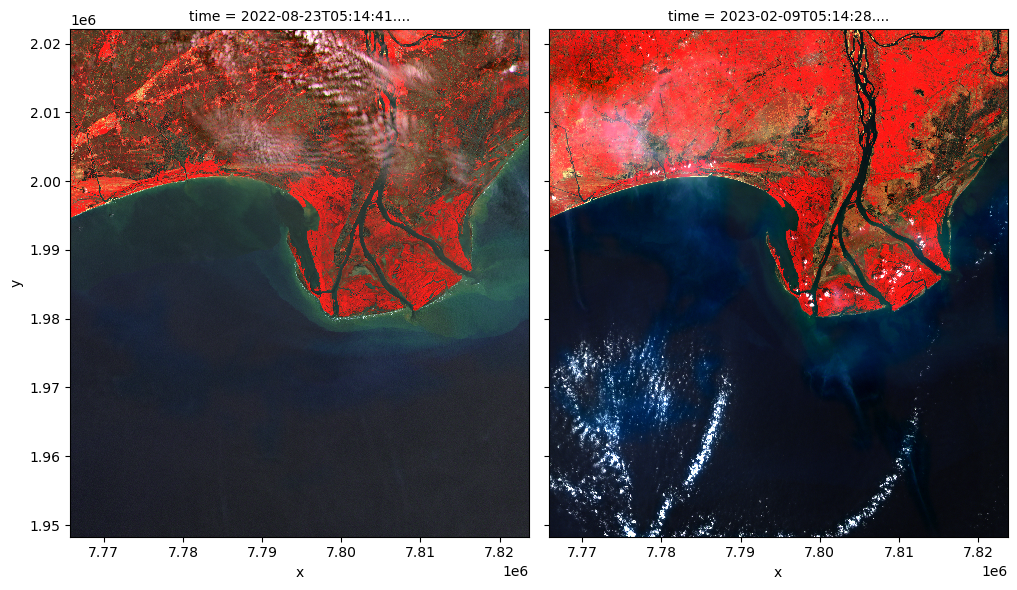

In [9]:
# Load the data from the Datacube
dataset = ds

rgb(ds, bands=['B08_10m', 'B04_10m', 'B02_10m'], index=[0, 1])

In [10]:
# Calculate the chosen vegetation proxy index and add it to the loaded data set
dataset =  odc.algo.to_f32(dataset)
band_diff =dataset.B03_10m - dataset.B08_10m
band_sum = dataset.B03_10m + dataset.B08_10m
mndwi=band_diff/band_sum
print(mndwi)


<xarray.DataArray (time: 2, y: 3688, x: 2896)>
array([[[-0.15686275, -0.14485776, -0.15812527, ..., -0.08181433,
         -0.08061182, -0.09279205],
        [-0.13801862, -0.14803626, -0.16747253, ..., -0.086661  ,
         -0.08578745, -0.0883095 ],
        [-0.15028901, -0.13567403, -0.1376392 , ..., -0.09714286,
         -0.09272097, -0.10585198],
        ...,
        [ 0.04176734,  0.02380952,  0.03589022, ...,  0.01534527,
          0.00366748,  0.02197112],
        [ 0.03208758,  0.03061601,  0.03588257, ...,  0.00935143,
          0.00117925,  0.00277179],
        [ 0.02897474,  0.04101417,  0.04124457, ...,  0.00761421,
         -0.00740264,  0.00655308]],

       [[-0.3957392 , -0.38176402, -0.36861375, ..., -0.23671308,
         -0.21307555, -0.19824708],
        [-0.30407754, -0.31430703, -0.33167613, ..., -0.22997712,
         -0.22426178, -0.18848385],
        [-0.2805421 , -0.2954764 , -0.3007019 , ..., -0.3426786 ,
         -0.3194661 , -0.27177176],
        ...,
       

<Figure size 800x800 with 0 Axes>

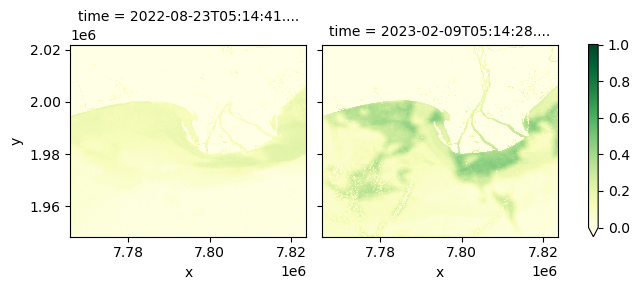

In [15]:

plt.figure(figsize=(8, 8))
mndwi.plot(col='time', cmap="YlGn", vmin=0, vmax=1, col_wrap=2)
plt.show()

Exporting animation to water_extent.gif


  0%|          | 0/2 (0.0 seconds remaining at ? frames/s)

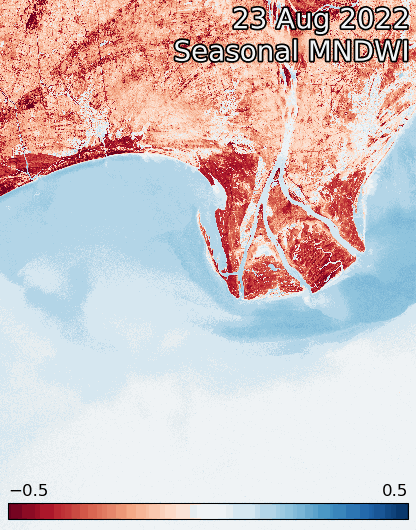

In [12]:
out_path = 'water_extent.gif'

xr_animation(ds=mndwi.to_dataset(name='MNDWI'), 
             output_path=out_path,
             bands = ['MNDWI'],
             show_text = 'Seasonal MNDWI',
             interval=500, 
             width_pixels=300,
             show_colorbar=True,
             imshow_kwargs={'cmap':'RdBu','vmin': -0.5, 'vmax': 0.5},
             colorbar_kwargs={'colors': 'black'}
            )

# Plot animated gif
plt.close()
Image(filename=out_path)

In [13]:

ds = dc.load(product="s2a_sen2cor_granule",
                 measurements=["B01_60m","B02_10m","B03_10m","B04_10m","B05_20m","B06_20m","B07_20m","B08_10m","B09_60m","B11_20m","B12_20m"],
             x=lon_range,
             y=lat_range,
             time=(start_year,end_year),
             output_crs='EPSG:6933',
             resolution=(-20, 20))
#Create a query object
query = {
    'x': lon_range,
    'y': lat_range,
    'resolution': (-20, 20),
   'output_crs':'EPSG:6933',
    'time': (start_year, end_year),
    #'dask_chunks':{'time':1,'x':500,'y':500}
}

In [14]:

pixel_length = query["resolution"][1]  # in metres
m_per_km = 1000  # conversion from metres to kilometres
area_per_pixel = pixel_length**2 / m_per_km**2
print(area_per_pixel)

0.0004
